In [3]:
!pip install opendatasets

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chhorakr
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:37<00:00, 65.1MB/s]


In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

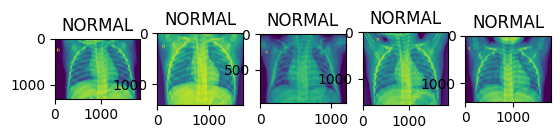

In [8]:
train_dir = "chest-xray-pneumonia/chest_xray/train"
train_data = os.listdir(train_dir)
for classes in train_data:
  class_path = os.path.join(train_dir,classes)
  img_name = os.listdir(class_path)
  random5 = random.sample(img_name,5)
  for index , image in enumerate(random5):
         image_path = os.path.join(class_path,image)
         img = Image.open(image_path)
         plt.subplot(1,5,index+1)
         plt.imshow(img)
         plt.title(classes)

In [ ]:
import os

for root, dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        if file.startswith("._") or "__MACOSX" in root:
            os.remove(os.path.join(root, file))

print("Cleanup done ✔️")


In [ ]:
import shutil

shutil.rmtree("/content/chest-xray-pneumonia/chest_xray/__MACOSX", ignore_errors=True)
shutil.rmtree("/content/chest-xray-pneumonia/chest_xray/chest_xray", ignore_errors=True)

print("Deleted ✔️")


In [ ]:
import hashlib

def hasher_images(file_path):
    with open(file_path,'rb') as f:  # image is in binary form so use 'rb'
        img = f.read()               # read entire file as bytes
    hashed = hashlib.md5(img)        # create MD5 hash from bytes
    return hashed.hexdigest()        # return hash string


duplicate = []
images = {}
for root, dirs , files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        hash_value = hasher_images(img_path)

        if hash_value in images:
            duplicate.append((hash_value,img_path))
        else:
            images[hash_value] = img_path

In [ ]:
len(duplicate)

In [ ]:
# Deleting Duplicates
for hash_value,img_path in duplicate:
    duplicate_img_path = img_path

    if os.path.exists(duplicate_img_path):
        try:
            os.remove(duplicate_img_path)
        except Exception as e:
            print("Error ",e)

print("Duplicate image are removed")

In [ ]:
import hashlib

def hasher_images(file_path):
    with open(file_path,'rb') as f:  # image is in binary form so use 'rb'
        img = f.read()               # read entire file as bytes
    hashed = hashlib.md5(img)        # create MD5 hash from bytes
    return hashed.hexdigest()        # return hash string


duplicate = []
images = {}
for root, dirs , files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        hash_value = hasher_images(img_path)

        if hash_value in images:
            duplicate.append((hash_value,img_path))
        else:
            images[hash_value] = img_path

In [ ]:
len(duplicate)

In [ ]:
# Number of images in training folder

train_dir = "chest-xray-pneumonia/chest_xray/train"
train_data = os.listdir(train_dir)
for classes in train_data:
    class_path = os.path.join(train_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

In [ ]:
# Number of images in testing folder

test_dir = "chest-xray-pneumonia/chest_xray/test"
test_data = os.listdir(test_dir)
for classes in test_data:
    class_path = os.path.join(test_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

In [ ]:
# Number of images in validation folder

val_dir = "chest-xray-pneumonia/chest_xray/val"
val_data = os.listdir(val_dir)
for classes in val_data:
    class_path = os.path.join(val_dir,classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")

In [ ]:
# Checking the image size

file_size = set()
for root,dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)

        with open(img_path,"rb") as img:
            image = Image.open(img_path)
            image_size = image.size
            file_size.add(image_size)

print(file_size)

In [ ]:
 # Checking the file size

unique_file_size = set()
for root,dirs, files in os.walk("chest-xray-pneumonia/chest_xray"):
    for file in files:
        img_path = os.path.join(root,file)
        try:
           file_size = os.path.getsize(img_path)/1024
           unique_file_size.add(file_size)
        except Exception as e:
            print("Error ",e)

print(unique_file_size)
print(sorted(unique_file_size))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/train",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/test",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "chest-xray-pneumonia/chest_xray/val",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)


In [ ]:
from tensorflow.keras.layers import (
    Input, Rescaling, RandomFlip, RandomZoom, RandomRotation,
    Conv2D, BatchNormalization, MaxPooling2D,
    Dropout, Dense, GlobalAveragePooling2D
)

In [ ]:
model = Sequential([

    Input(shape=(256, 256, 3)),

    # preprocessing
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1),

    # Block 1
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    GlobalAveragePooling2D(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(1, activation="sigmoid")   # because 2 classes
])

model.summary()


In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
callbacks = [

    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),

    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0.005,
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),

    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)

    preds = (preds > 0.5).astype("int32")   # threshold

    y_pred.extend(preds.flatten())
    y_true.extend(labels.numpy())


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred)*100)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal','Pneumonia'],
            yticklabels=['Normal','Pneumonia'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
